In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy as stats

In [2]:
#Loading Dataset
file_path = 'C:/Users/chidubem-tech/Desktop/weather_forecast_data.csv'

In [3]:
df = pd.read_csv(file_path)

In [4]:
df.head()

,Temperature,Humidity,Wind_Speed,Cloud_Cover,Pressure,Rain
0,23.720338,89.592641,7.335604,50.501694,1032.378759,rain
1,27.879734,46.489704,5.952484,4.990053,992.614189,no rain
2,25.069084,83.072843,1.371992,14.855784,1007.231620,no rain
3,23.622080,74.367758,7.050551,67.255282,982.632013,rain
4,20.591370,96.858822,4.643921,47.676444,980.825142,no rain


In [5]:
df.tail()

,Temperature,Humidity,Wind_Speed,Cloud_Cover,Pressure,Rain
2495,21.791602,45.270902,11.807192,55.044682,1017.686181,no rain
2496,27.558479,46.481744,10.884915,39.715133,1008.590961,no rain
2497,28.108274,43.817178,2.897128,75.842952,999.119187,no rain
2498,14.789275,57.908105,2.374717,2.378743,1046.501875,no rain
2499,26.554356,97.101517,18.563084,81.357508,1001.729176,no rain


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2500 entries, 0 to 2499
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Temperature  2500 non-null   float64
 1   Humidity     2500 non-null   float64
 2   Wind_Speed   2500 non-null   float64
 3   Cloud_Cover  2500 non-null   float64
 4   Pressure     2500 non-null   float64
 5   Rain         2497 non-null   object 
dtypes: float64(5), object(1)
memory usage: 117.3+ KB


In [7]:
df.describe(include='all')

,Temperature,Humidity,Wind_Speed,Cloud_Cover,Pressure,Rain
count,2500.000000,2500.000000,2500.000000,2500.000000,2500.000000,2497
unique,NaN,NaN,NaN,NaN,NaN,2
top,NaN,NaN,NaN,NaN,NaN,no rain
freq,NaN,NaN,NaN,NaN,NaN,2183
mean,22.581725,64.347094,9.906255,49.658104,1014.312336,NaN
std,7.326996,19.954739,5.780316,29.123104,20.196433,NaN
min,10.001842,30.005071,0.009819,0.015038,980.014486,NaN
25%,16.359398,47.339815,4.761909,23.900016,996.938630,NaN
50%,22.536448,63.920797,9.908572,49.488284,1013.433035,NaN
75%,28.976476,81.561021,14.948408,75.324140,1031.735067,NaN


## Data Preprocessing

In [8]:
df.isnull().sum() #Checking for null values

Temperature    0
Humidity       0
Wind_Speed     0
Cloud_Cover    0
Pressure       0
Rain           3
dtype: int64

In [9]:
df.dropna(subset=["Rain"],inplace=True) #Drop null values

In [10]:
df.shape

(2497, 6)

In [11]:
df.duplicated().sum() #Checking for duplicates

0

## Exploratory Data Analysis (EDA)

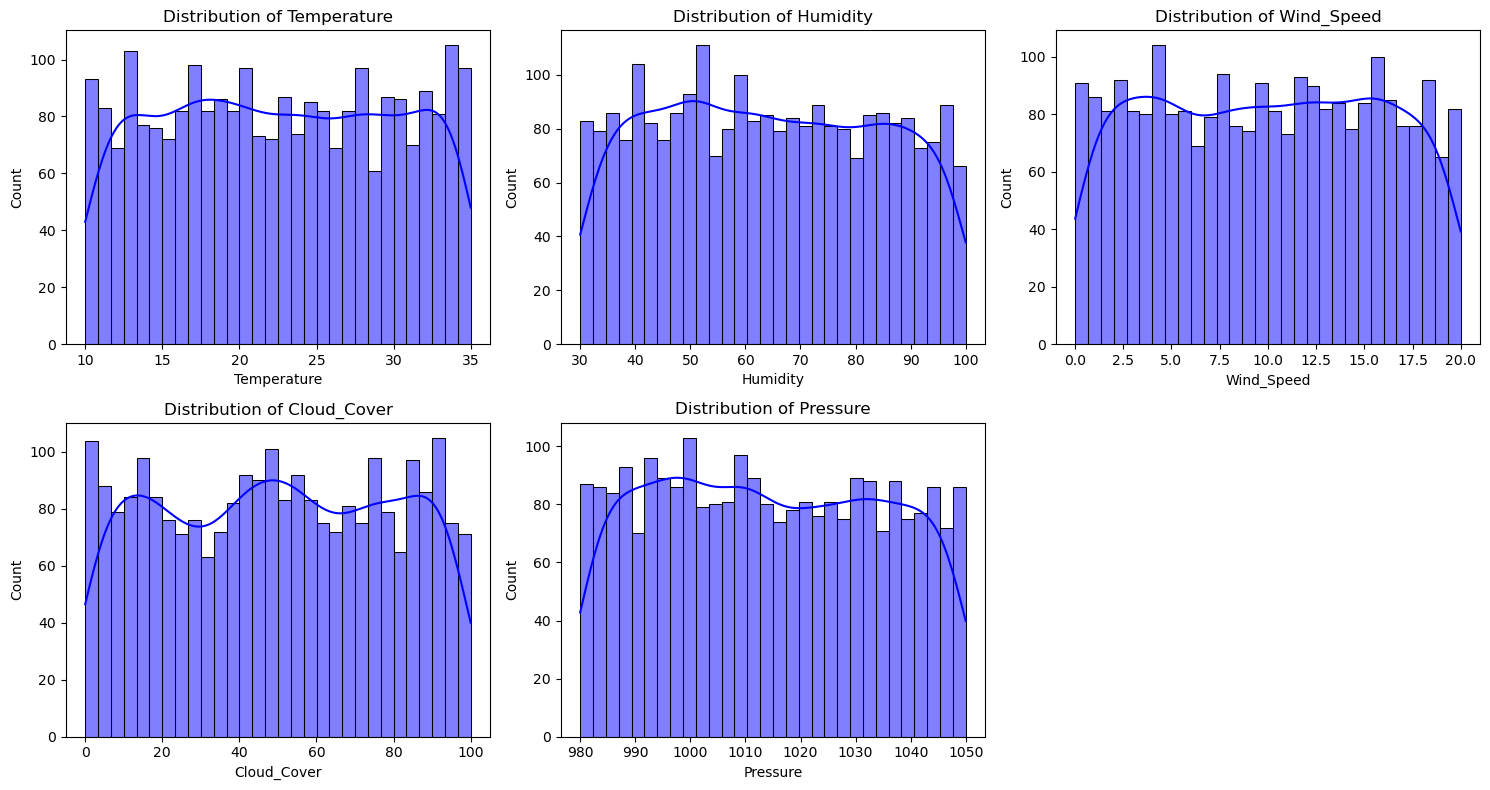

In [12]:
#Plot distribution for numerical values
plt.figure(figsize=(15,8))
for i, column in enumerate (['Temperature', 'Humidity', 'Wind_Speed', 'Cloud_Cover', 'Pressure']):
    plt.subplot(2, 3, i + 1)
    sns.histplot(df[column], kde=True, color='blue', bins=30)
    plt.title(f'Distribution of {column}')
    
plt.tight_layout()
plt.show()

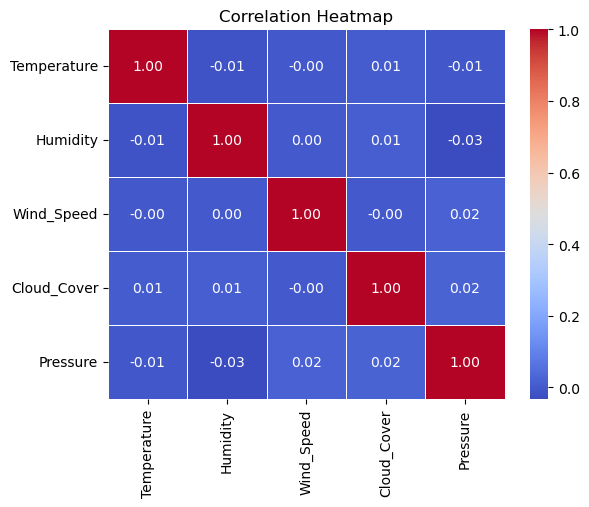

In [13]:
#Correlation heatmap
features_distribution= ['Temperature', 'Humidity', 'Wind_Speed', 'Cloud_Cover', 'Pressure']
correlation_matrix = df[features_distribution].corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('Correlation Heatmap')
plt.show()

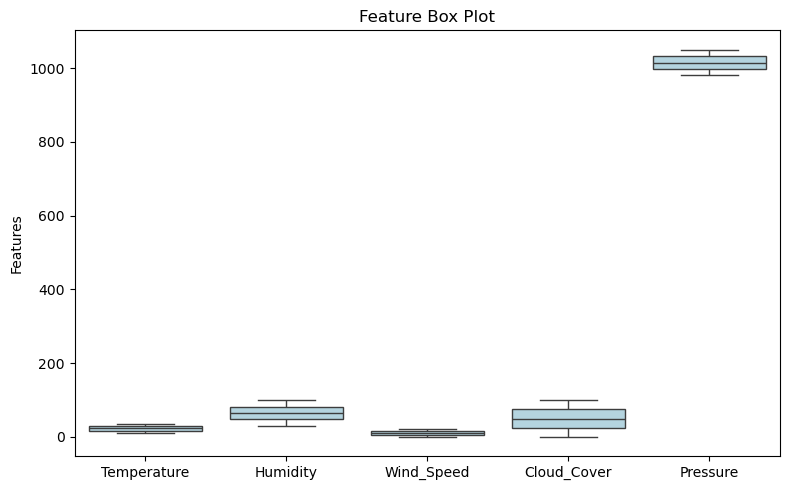

In [14]:
#Plotting a box-and- whisker plot to discover data distribution and outliers
feature_distribution= ['Temperature', 'Humidity', 'Wind_Speed', 'Cloud_Cover', 'Pressure']
plt.figure(figsize=(8,5))
sns.boxplot(df[feature_distribution], color='lightblue')
plt.title('Feature Box Plot')
plt.ylabel('Features')
plt.tight_layout()
plt.show()

## Model Building

### Splitting the dataset

In [29]:
#Splitting the dataset into features (X) and Target(y)
X= df.drop('Rain', axis=1, inplace=False) #All columns except Rain
X

,Temperature,Humidity,Wind_Speed,Cloud_Cover,Pressure
0,23.720338,89.592641,7.335604,50.501694,1032.378759
1,27.879734,46.489704,5.952484,4.990053,992.614189
2,25.069084,83.072843,1.371992,14.855784,1007.231620
3,23.622080,74.367758,7.050551,67.255282,982.632013
4,20.591370,96.858822,4.643921,47.676444,980.825142
...,...,...,...,...,...
2495,21.791602,45.270902,11.807192,55.044682,1017.686181
2496,27.558479,46.481744,10.884915,39.715133,1008.590961
2497,28.108274,43.817178,2.897128,75.842952,999.119187
2498,14.789275,57.908105,2.374717,2.378743,1046.501875


In [17]:
y=df['Rain'] #Target Variable
y

0          rain
1       no rain
2       no rain
3          rain
4       no rain
         ...   
2495    no rain
2496    no rain
2497    no rain
2498    no rain
2499    no rain
Name: Rain, Length: 2497, dtype: object

In [18]:
#Split the dataset into training and testing sets(80% training and 20% testing)
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [19]:
X_train

,Temperature,Humidity,Wind_Speed,Cloud_Cover,Pressure
109,33.818725,62.276580,18.923217,53.370971,1000.595246
1960,13.129041,49.596163,5.225892,68.002795,1037.555064
354,23.404437,57.201245,9.120141,1.529719,1024.694465
266,17.043253,46.685954,19.437548,45.462319,1043.060899
2103,23.640723,53.065253,0.648855,44.506004,1037.324818
...,...,...,...,...,...
1641,20.378131,91.349239,0.264460,51.380977,981.191417
1095,28.974614,58.618211,13.531515,67.976388,1025.789614
1130,10.051616,30.573940,9.517521,54.450577,997.630125
1295,30.775778,82.680118,4.823796,16.754065,981.340621


In [20]:
X_test

,Temperature,Humidity,Wind_Speed,Cloud_Cover,Pressure
2295,34.503976,69.420805,6.416737,98.353854,1000.992098
2402,10.790136,49.754101,3.214660,56.861333,1043.561557
902,15.286370,64.834321,16.876478,39.787946,1026.974636
2241,26.719564,49.377945,11.858703,85.885745,987.209741
1286,13.493644,96.957211,7.854705,19.287690,1040.160047
...,...,...,...,...,...
2055,10.001842,78.251648,4.980841,29.887058,1033.641741
1861,12.026345,42.908073,2.081604,48.128344,1045.758916
1863,21.364747,58.716707,15.059174,71.818437,1038.224520
1151,25.849673,84.444829,2.894246,2.974505,996.020872


In [21]:
y_train

109     no rain
1960    no rain
354     no rain
266     no rain
2103    no rain
         ...   
1641       rain
1095    no rain
1130    no rain
1295    no rain
860     no rain
Name: Rain, Length: 1997, dtype: object

In [22]:
y_test

2295    no rain
2402    no rain
902     no rain
2241    no rain
1286    no rain
         ...   
2055    no rain
1861    no rain
1863    no rain
1151    no rain
461        rain
Name: Rain, Length: 500, dtype: object

## Model Training

In [23]:
from sklearn.ensemble import RandomForestClassifier
rf =RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

### Make predictions on the test set

In [24]:
y_rf_test_pred=rf.predict(X_test)

### Model Evaluation

In [25]:
from sklearn.metrics import confusion_matrix

In [26]:
cm = confusion_matrix(y_test, y_rf_test_pred)

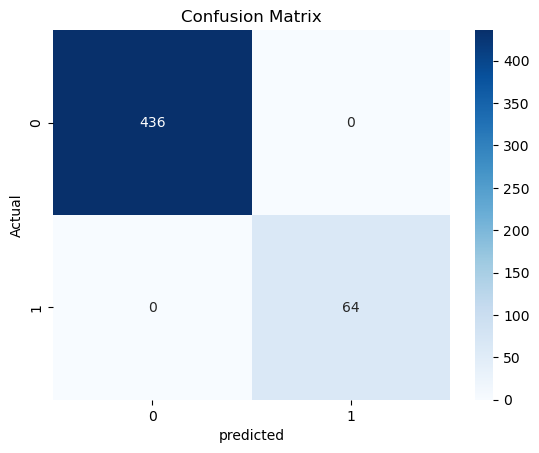

In [27]:
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel('predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

In [28]:
from sklearn.metrics import classification_report
report = classification_report(y_test, y_rf_test_pred)
print (report)

              precision    recall  f1-score   support

     no rain       1.00      1.00      1.00       436
        rain       1.00      1.00      1.00        64

    accuracy                           1.00       500
   macro avg       1.00      1.00      1.00       500
weighted avg       1.00      1.00      1.00       500



## Comment

The Model accurately predicts all instances, "Rain" and "No Rain" without error.
Accuracy: 100% of predictions are correct.
Precision(1.00): Measures the proportion of True positives among predicted positives
Recall(1.00): Measures the proportion of True positives among actual positives
F1-Score(1.00): The harmonic mean of precision and recall balancing the two

The level of performance(1.00 for all metrices) is unusual and suggests that either the model is highly effective and overfitted.